In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Edaproj/hotel_bookings_proj.csv')

### **Data Cleaning & Exploratory Analysis :**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],format='%d-%m-%Y')

In [ ]:
df.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
for col in df.describe(include='O').columns:
  print(col)
  print(df[col].unique(),'\n')

hotel
['Resort Hotel' 'City Hotel'] 

arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 

meal
['BB' 'FB' 'HB' 'SC' 'Undefined'] 

country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ET

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(['company','agent'], axis=1, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: ylabel='adr'>

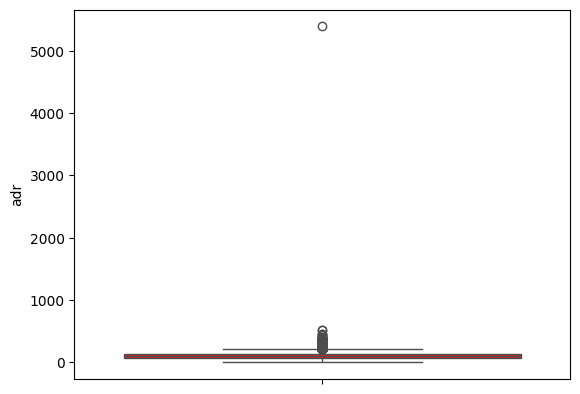

In [ ]:
sns.boxplot(y=df['adr'], color='red')

In [ ]:
df=df[df['adr']<5000]

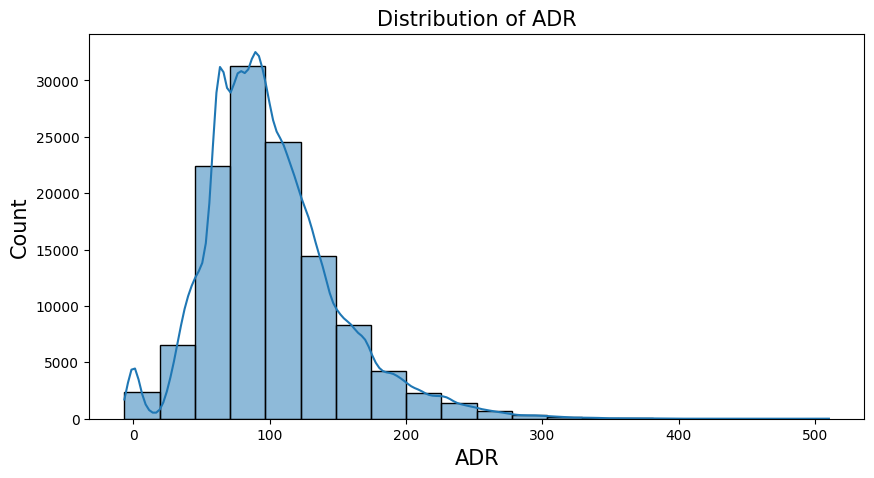

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['adr'], bins=20, kde=True)
plt.xlabel('ADR', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of ADR', fontsize=15)
plt.show()


## **Data Analysis And Visualizations :**

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64 



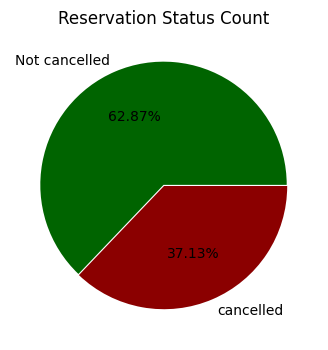

In [ ]:
#Reservation status:

cancellation_per = df['is_canceled'].value_counts(normalize=True)
print(cancellation_per,'\n')
# Set the title and labels of the chart
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.pie(cancellation_per, labels=['Not cancelled', 'cancelled'], autopct='%.2f%%', explode=[0.01,0], colors=['darkgreen','darkred'])
plt.show()

Conclusions:

A significant portion (approximately 37%) of reservations are being cancelled which has a significant impact on hotel's earning.

The majority of reservations (about 63%) remain unaffected.

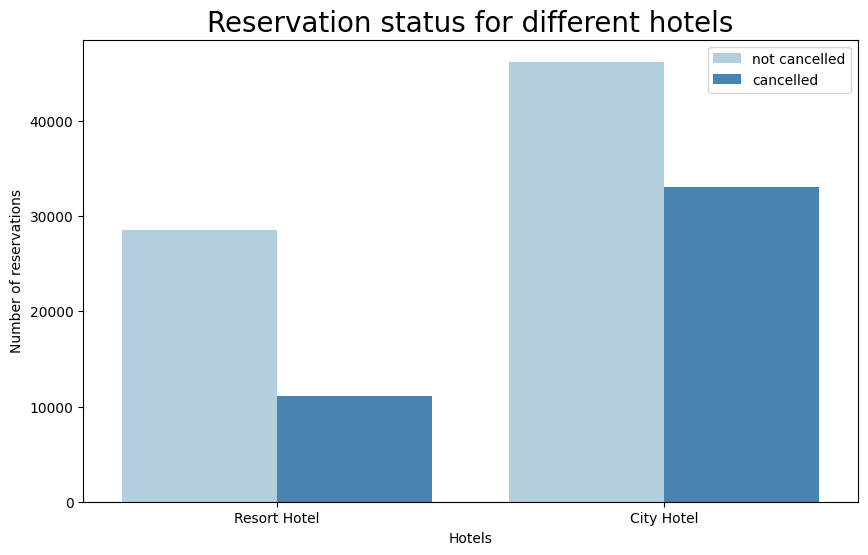

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
plt.title('Reservation status for different hotels', size=20)
plt.xlabel('Hotels')
plt.ylabel('Number of reservations')
plt.legend(['not cancelled', 'cancelled'])
plt.show()

Conclusions:

The City Hotels has a higher overall number of reservations (both cancelled and not cancelled) compared to the Resort Hotels. It is possible that resort hotels are more expensive than city hotels.

The cancellation is higher for City Hotels than Resort Hotels, indicating that guests are more likely to cancel their reservations in City Hotels.

In [ ]:
resort_hotel = df[(df['hotel'] == 'Resort Hotel')]
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

Approximately 27% of reservations are being cancelled for Resort Hotels.

In [ ]:
city_hotel = df[(df['hotel'] == 'City Hotel')]
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

Approximately 41% of reservations are being cancelled for City Hotels.

In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
print(resort_hotel,'\n')
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
print(city_hotel)

                                adr
reservation_status_date            
2014-11-18                 0.000000
2015-01-01                61.966667
2015-01-02                 9.633750
2015-01-18                 0.000000
2015-01-21                37.301209
...                             ...
2017-09-08               101.012500
2017-09-09               147.778333
2017-09-10               145.272500
2017-09-12               153.570000
2017-09-14               105.930000

[913 rows x 1 columns] 

                                adr
reservation_status_date            
2014-10-17                62.800000
2015-01-01                62.063158
2015-01-20                76.500000
2015-01-30                61.400000
2015-02-17                76.500000
...                             ...
2017-09-03               137.172600
2017-09-04               116.925385
2017-09-05               154.000000
2017-09-06                93.293333
2017-09-07               159.685000

[864 rows x 1 columns]


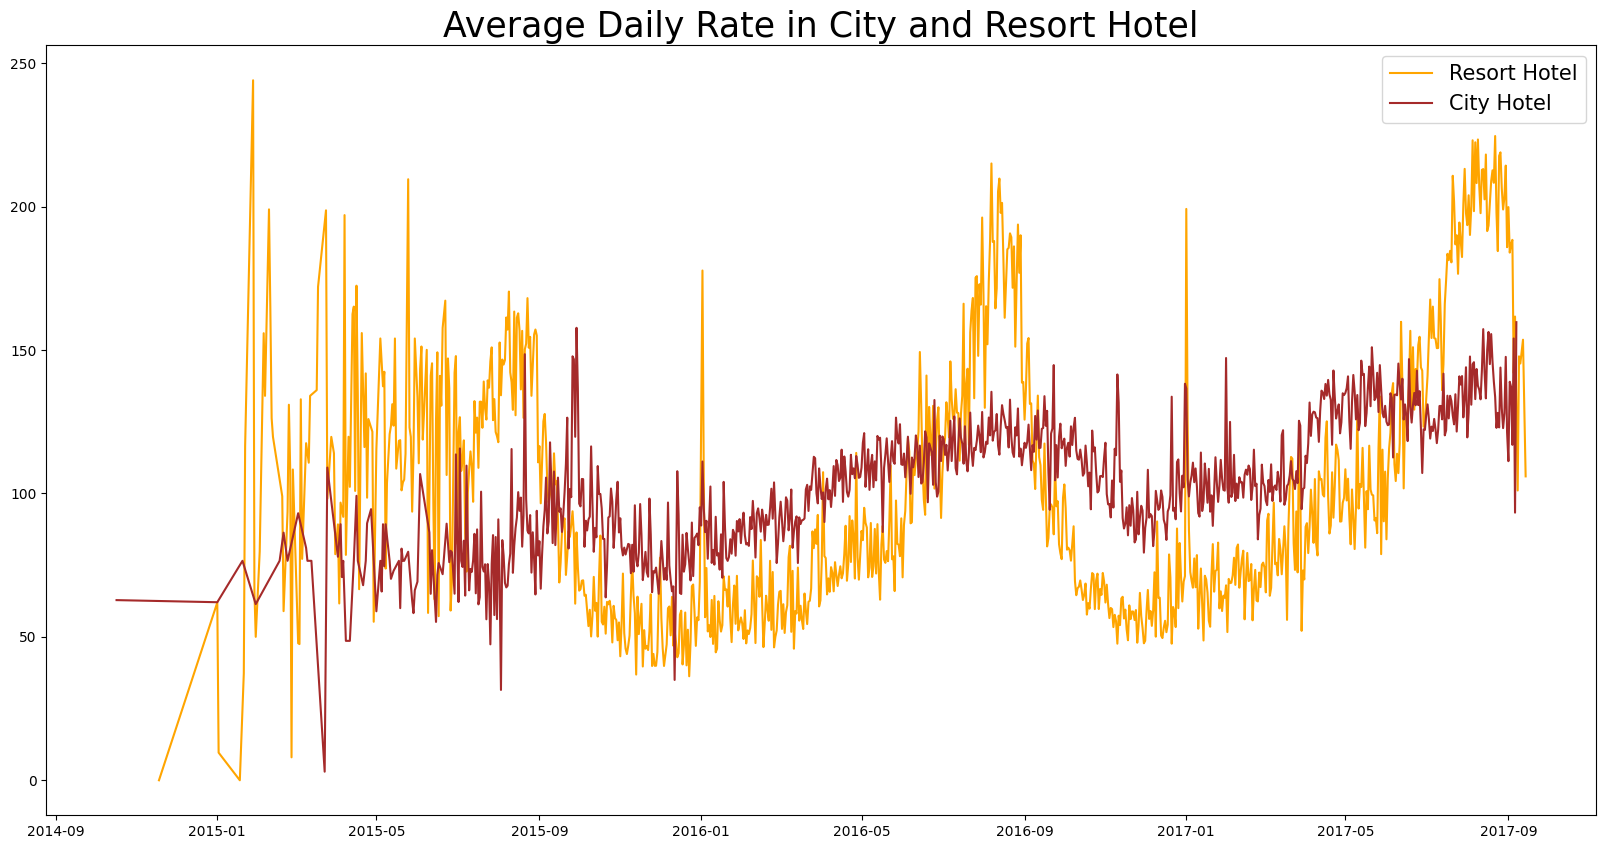

In [ ]:
#Average Daily Rate For City And Resort Hotels
plt.figure(figsize=(20,10))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=25)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel', color='orange')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel',color='brown')
plt.legend(fontsize=15)
plt.show()

Conclusion:

The ADR trends for Resort Hotels show higher volatility and significant seasonal spikes compared to the more stable ADR trends of City Hotels. Both hotel types experience seasonal fluctuations, with peaks likely during holidays and vacation periods. The higher ADR periods may correspond to higher cancellation rates, particularly for Resort Hotels.

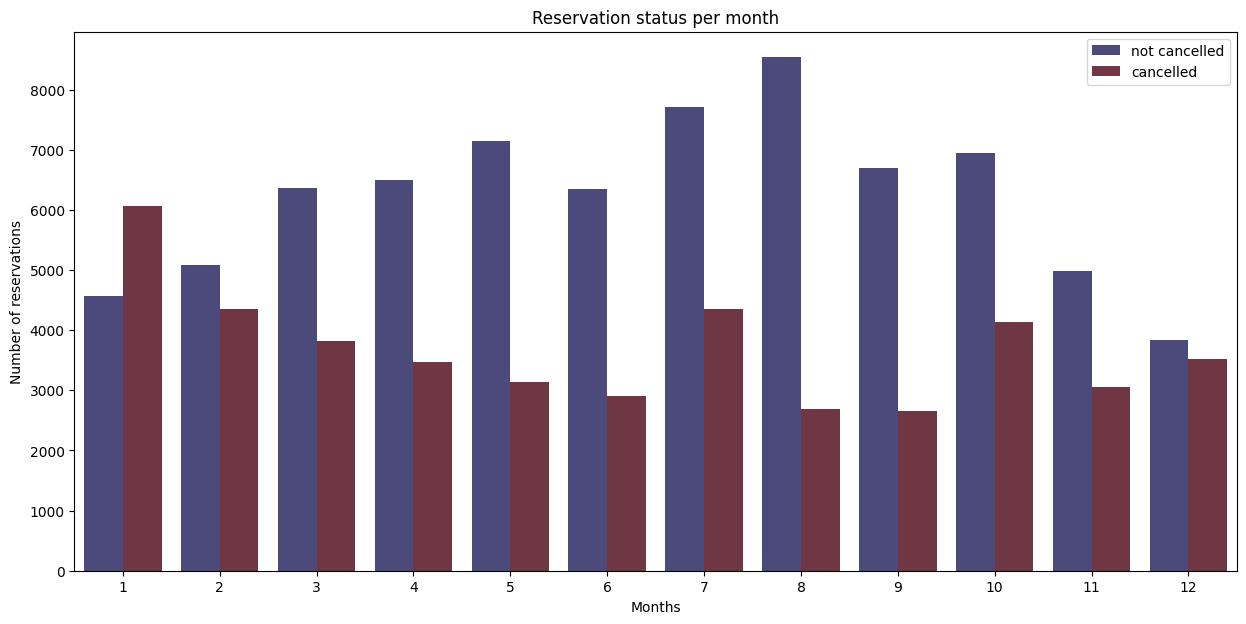

In [ ]:
#Reservation Status with respect to months
df['months']= df['reservation_status_date'].dt.month
plt.figure(figsize=(15,7))
sns.countplot(data = df, x='months', hue='is_canceled', palette='icefire')
plt.title('Reservation status per month')
plt.xlabel('Months')
plt.ylabel('Number of reservations')
plt.legend(['not cancelled', 'cancelled'])
plt.show()

Conclusion:

In above bar graph we analyze the months with highest and lowest reservation levels according to the reservation status.
As evident from the graph, the no. of canceled reservations are higher in the month of January and the no. of confirmed reservations are higher in the month of August.




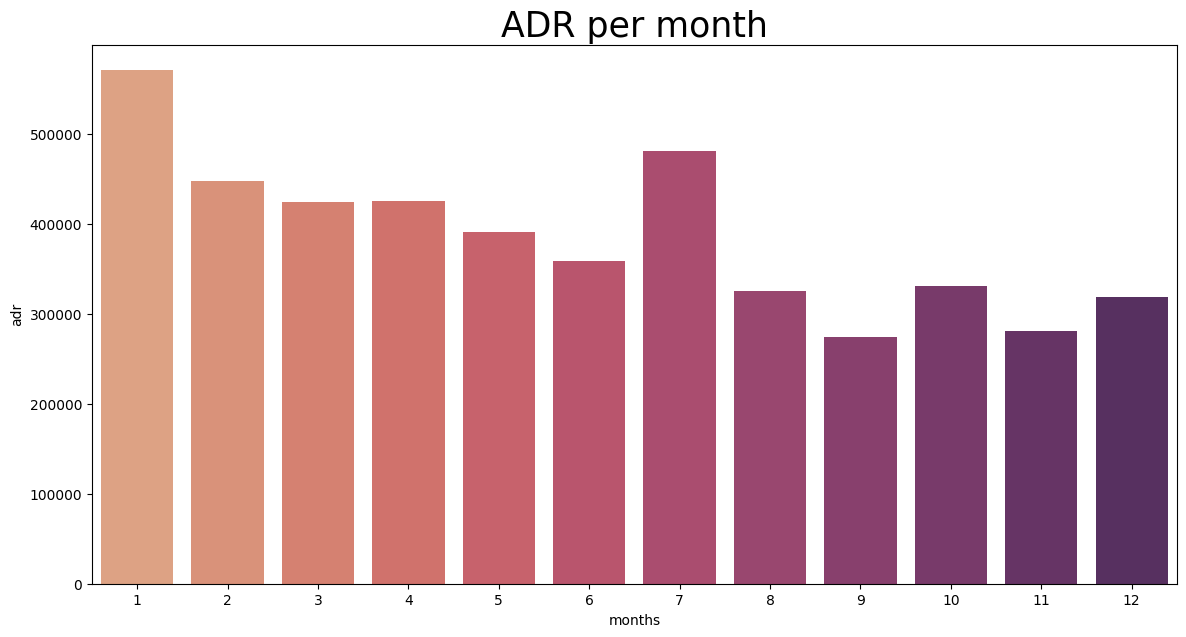

In [ ]:
#Average Daily Rate with respect to months for canceled reservations
plt.figure(figsize=(14,7))
plt.title('ADR per month',fontsize = 25)
sns.barplot(x='months', y='adr', data=df[df['is_canceled']==1].groupby('months')[['adr']].sum().reset_index(), palette='flare')
plt.show()

Conclusion:

The above bar graph demonstrate that cancellations are most common when the prices are highest and least common when they are lowest. Therefore, the cost of accommodation is responsible for the cancellation.

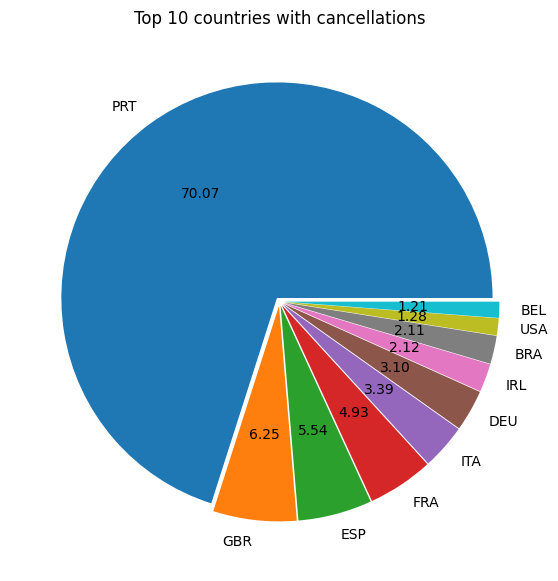

In [ ]:
#Top 10 countries with most number of cancellations
canceled_data = df[df['is_canceled'] == 1]
country_top10 = canceled_data['country'].value_counts().head(10)
plt.figure(figsize=(7,7))
plt.title('Top 10 countries with cancellations')
plt.pie(country_top10, labels=country_top10.index, autopct='%.2f', explode=[0.02]*country_top10.count())
plt.show()

Conclusion:

From above pie chart, it's clear that the Portugal has the highest no. of cancellations(approximately 70%) amoung the top 10 countries.

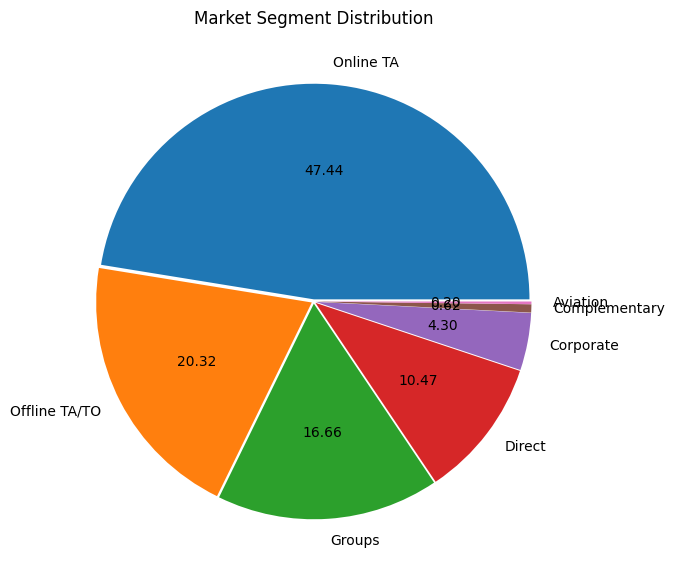

In [ ]:
market_df = df['market_segment'].value_counts(normalize=True)
plt.figure(figsize=(7,7))
plt.pie(market_df, labels=market_df.index, autopct='%.2f', explode=[0.01]*market_df.count())
plt.title('Market Segment Distribution')
plt.show()


Conclusion: Around 47% of the clients comes from Online travel agencies, 20% from Offline travel agencies, 16% from groups and only 10% of clients book hotels directly by visiting.

In [ ]:
canceled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

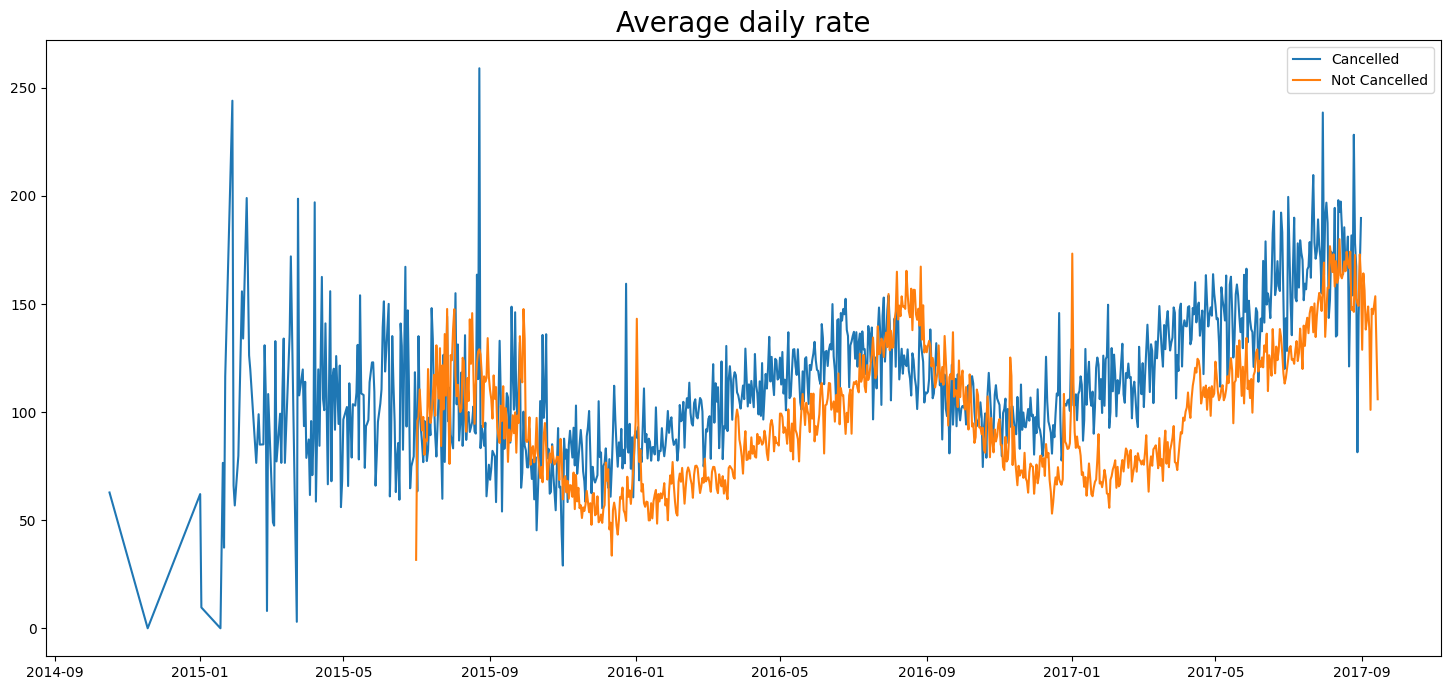

In [ ]:
df_cancelled_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
df_cancelled_adr.reset_index(inplace=True)
df_cancelled_adr.sort_values('reservation_status_date', inplace=True)

df_notcancelled_adr = df[df['is_canceled'] == 0].groupby('reservation_status_date')[['adr']].mean()
df_notcancelled_adr.reset_index(inplace=True)
df_notcancelled_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(18,8))
plt.plot(df_cancelled_adr['reservation_status_date'], df_cancelled_adr['adr'], label='Cancelled')
plt.plot(df_notcancelled_adr['reservation_status_date'], df_notcancelled_adr['adr'], label='Not Cancelled')
plt.title('Average daily rate',fontsize = 20)
plt.legend()
plt.show()

In [ ]:
df_cancelled_adr = df_cancelled_adr[(df_cancelled_adr['reservation_status_date'] > '2016') & (df_cancelled_adr['reservation_status_date'] < '2017-09')]
df_notcancelled_adr = df_notcancelled_adr[(df_notcancelled_adr['reservation_status_date'] > '2016') & (df_notcancelled_adr['reservation_status_date'] < '2017-09')]


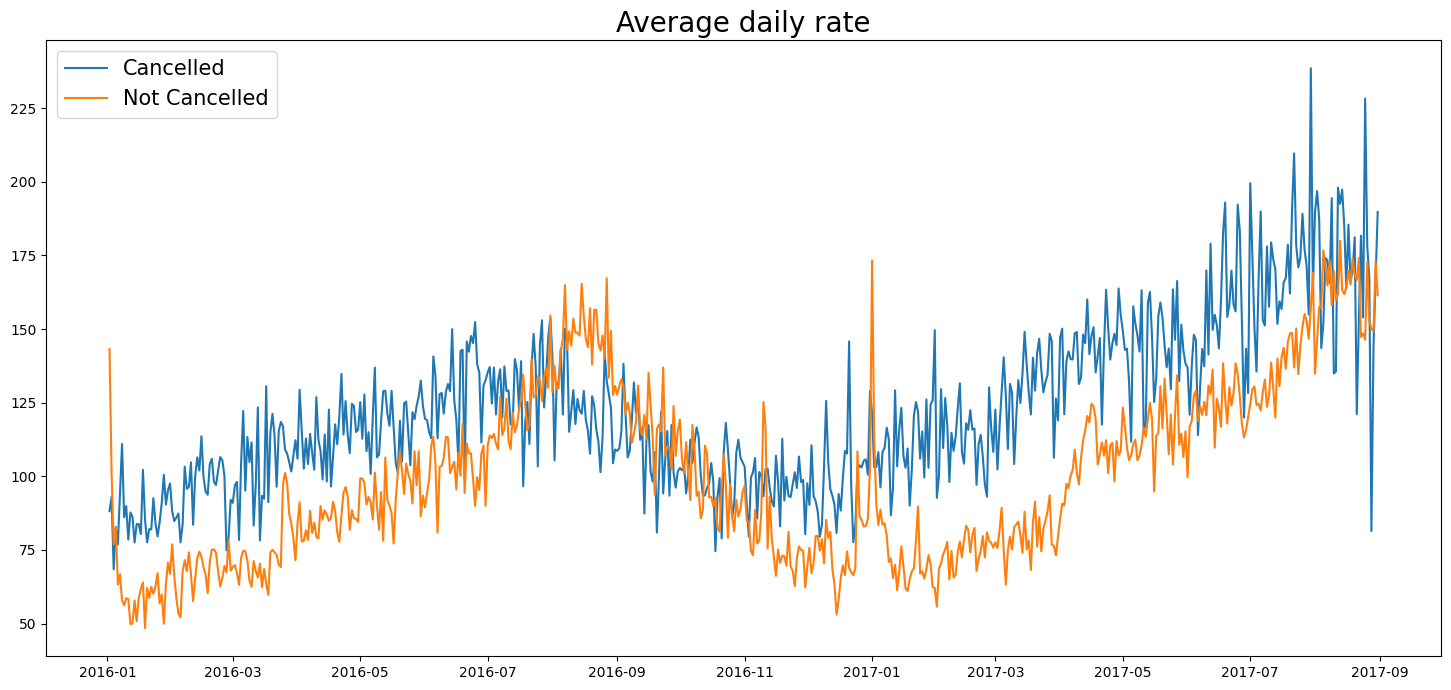

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(df_cancelled_adr['reservation_status_date'], df_cancelled_adr['adr'], label='Cancelled')
plt.plot(df_notcancelled_adr['reservation_status_date'], df_notcancelled_adr['adr'], label='Not Cancelled')
plt.title('Average daily rate',fontsize = 20)
plt.legend(fontsize=15)
plt.show()

Conclusion:

The ADR for cancelled bookings is consistently higher than the ADR for non-cancelled bookings throughout the observed period. This suggests that higher ADRs may lead to an increased likelihood of cancellations. Significant peaks in ADR correspond with higher cancellation rates, indicating price sensitivity among customers.

### **Other Factors Affecting Cancellations:**

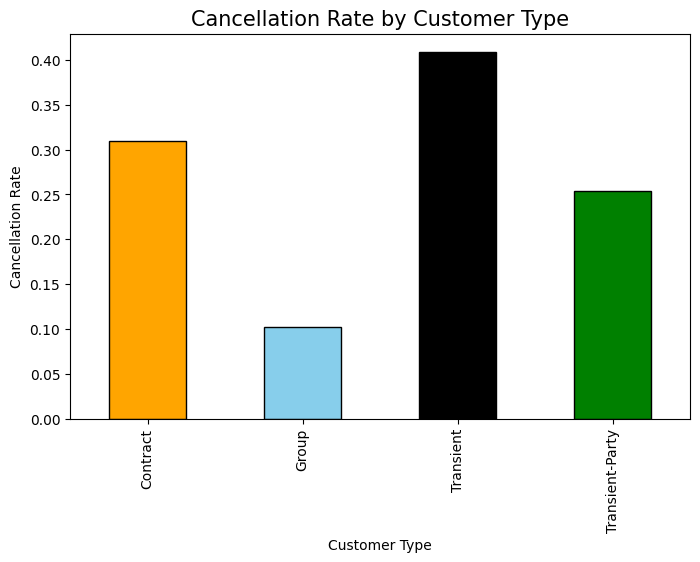

In [ ]:
#cancellation rates based on customer type.

cancellation_by_customer_type = df.groupby('customer_type')['is_canceled'].mean()


cancellation_by_customer_type.plot(kind='bar', figsize=(8,5),edgecolor="black", color=['orange','skyblue','black','green'])
plt.title('Cancellation Rate by Customer Type', size=15)
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()


Conclusion:

The above bar chart shows that Transient customers have the highest cancellation rate, followed by Contract and Transient-Party customers. Group customers have the lowest cancellation rate. The high cancellation rates for Transient and Contract customers indicate that these segments may be more sensitive to changes in pricing.

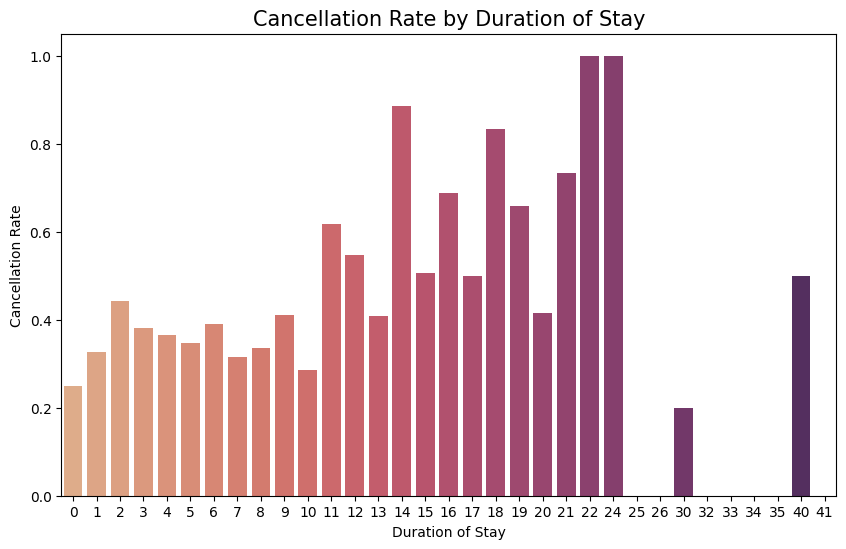

In [ ]:
#cancellation rates based on duration of stay
cancellation_by_stay_duration = df.groupby('stays_in_week_nights')['is_canceled'].mean()


plt.figure(figsize=(10,6))
sns.barplot(x=cancellation_by_stay_duration.index, y=cancellation_by_stay_duration.values, palette='flare')
plt.title('Cancellation Rate by Duration of Stay',size = 15)
plt.xlabel('Duration of Stay')
plt.ylabel('Cancellation Rate')

plt.show()


Conclusion:

The cancellation rate varies significantly with the duration of stay, peaking for stays of 14 and 22-24 days, where the cancellation rate reaches close to 1.0. Shorter stays generally have lower cancellation rates. This indicates that longer bookings are more prone to cancellations, possibly due to changes in travel plans or higher costs associated with extended stays.

# **Conclusion Summary:**

City Hotels experience a higher number of overall reservations and cancellations compared to Resort Hotels, with 41% of City Hotel reservations being canceled versus 27% for Resort Hotels. The ADR (Average Daily Rate) trends for Resort Hotels show greater volatility and seasonal spikes, especially during high-demand periods like holidays, leading to higher cancellations. In contrast, City Hotels have more stable ADR trends. Cancellations are most frequent in January and least in August, and higher prices correlate with increased cancellations, highlighting cost sensitivity among guests. Approximately 47% of clients book through Online Travel Agencies, which, coupled with the consistently higher ADR for canceled bookings, indicates that price fluctuations significantly impact cancellations. Transient customers exhibit the highest cancellation rates, followed by Contract and Transient-Party customers, whereas Group customers have the lowest. Additionally, longer bookings are more likely to be canceled, likely due to changing travel plans and the higher costs associated with extended stays.

# **Suggestions:**



*   In order to prevent cancelation of reservations, Hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations or provide some discounts to the clients.

*   As the ratio of the canceled and not canceled of the resort hotels is higher than that of city hotels. so the hotels should provide a reasonable discount on the room prices on weekends or holidays.

*   As the cancellations are higher in the month of January, the hotels can start campaigns or marketings with reasonable amount to increase their revenue.

*  Quality of hotels and their services can be increased mainly in portugal to reduce cancellation.

*  Enhance the booking experience on Online Travel Agency platforms to reduce cancellations from the major customer segment.


*   Consider price adjustments or special offers during high ADR periods to reduce cancellations.


*   Provide discounts for extended stays to mitigate higher costs.






